In [1]:
#import relevant libraries: pip install re, pip install natsort, pip install plotly==5.10.0
import sys
import os
import glob

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import datetime as dt8
import math
import matplotlib.pyplot as plt
import decimal
import re
from natsort import index_natsorted
import dabest
import dabest_jck

import NLCLIMB 
import NLGRAPHS
import NLMATH

import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#NOTE: SUPPRESSES WARNINGS!

import warnings

warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [ ]:
print(dabest.__version__)

In [2]:
#initial file processing
computer1 = "C:\\Users\\User"
computer2 = "C:\\Users\\lnico"
homecomp = "D:"
filedir = "\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\Data Compilation\\Falling_New\\"
openPath = homecomp + filedir
files = os.listdir(openPath)

#identifying genotypes
responder = "Chrimson2"
driver = "MB082C"

wt = "w1118"
transgenic = driver + " x " + responder
filename = openPath + transgenic + ".csv"
filenamewt = openPath + wt+"_"+ transgenic + ".csv"

print(filename)
print(filenamewt)

D:\ACC Lab Dropbox\ACC Lab\Nicole Lee\Data Compilation\Falling_New\MB082C x Chrimson2.csv
D:\ACC Lab Dropbox\ACC Lab\Nicole Lee\Data Compilation\Falling_New\w1118_MB082C x Chrimson2.csv


In [3]:
dfe=pd.read_csv(filename)
dfw= pd.read_csv(filenamewt)

exptdf = dfe.drop(dfe.columns[[0]],axis = 1)
wtdf = dfw.drop(dfw.columns[[0]],axis = 1)

dfexpt = NLCLIMB.fivesecondrule(NLCLIMB.generation(exptdf, driver))
dfwt = NLCLIMB.fivesecondrule(NLCLIMB.generation(wtdf, wt))


# functions

In [4]:
def falls(dfe_dark, dfe_full, dfw_dark, dfw_full):
    
    filtered = (dfe_dark.filter(regex="Fall.*").sum(axis=0))/1
    filtered2 = (dfe_full.filter(regex="Fall.*").sum(axis=0))/1
    filtered3 = (dfw_dark.filter(regex="Fall.*").sum(axis=0))/1
    filtered4 = (dfw_full.filter(regex="Fall.*").sum(axis=0))/1

    awt=pd.DataFrame()
    awt['Falls']=filtered
    awt['ExperimentState'] = "Dark"

    awt2=pd.DataFrame()
    awt2['Falls']=filtered2
    awt2['ExperimentState'] = "Full"


    awt2b = pd.concat([awt, awt2]).reset_index()
    awt2b["Type"] = "Expt"

    awt3=pd.DataFrame()
    awt3['Falls']=filtered3
    awt3['ExperimentState'] = "Dark"

    awt4=pd.DataFrame()
    awt4['Falls']=filtered4
    awt4['ExperimentState'] = "Full"
    awt4b = pd.concat([awt3, awt4]).reset_index()
    awt4b["Type"] = "WT"
    

    awt5=pd.DataFrame()
    awt5 = pd.concat([awt2b, awt4b])
    
    return awt5

def seap(dfexpt, phaser):
    phase = ['Dark', 'Full']
    squak = pd.DataFrame()
    for n in phase:
        fg = pd.DataFrame()
        gh = pd.DataFrame()
        pi = pd.DataFrame()
        dfe_dark = dfexpt[(dfexpt['ExperimentState']== n)] 
        fg['metric'] = dfe_dark.head(int(len(dfe_dark)/2)).filter(regex="Fall.*").sum(axis=0)
        fg['genre'] = n + " " + phaser + " 10"
        fg['time'] = 10
        gh['metric'] = dfe_dark.tail(int(len(dfe_dark)/2)).filter(regex="Fall.*").sum(axis=0)
        gh['genre'] = n + " " + phaser + " 20"
        gh['time']= 20
        pi = pd.concat([fg, gh], axis = 0)     
        pi['phase'] = n
        pi['type'] = phaser
        
        squak = pd.concat([squak, pi], axis = 0)
        
    return squak

def sean(dfexpt, phaser):
    phase = ['Dark', 'Full']
    squak = pd.DataFrame()
    for n in phase:
        fg = pd.DataFrame()
        gh = pd.DataFrame()
        pi = pd.DataFrame()
        dfe_dark = dfexpt[(dfexpt['ExperimentState']== n)] 
        fg['metric'] = dfe_dark.head(int(len(dfe_dark)/2)).filter(regex="Velocity.*").mean()
        fg['genre'] = n + " " + phaser + " 10"
        fg['time'] = 10
        gh['metric'] = dfe_dark.tail(int(len(dfe_dark)/2)).filter(regex="Velocity.*").mean()
        gh['genre'] = n + " " + phaser + " 20"
        gh['time']= 20
        pi = pd.concat([fg, gh], axis = 0)     
        pi['phase'] = n
        pi['type'] = phaser
        
        squak = pd.concat([squak, pi], axis = 0)
        
    return squak

def fallsr(dfe_dark, dfe_full, dfw_dark, dfw_full, dfer, dfwr):
    
    filtered = (dfe_dark.filter(regex="Fall.*").sum(axis=0))/1
    filtered2 = (dfe_full.filter(regex="Fall.*").sum(axis=0))/1
    filtered3 = (dfw_dark.filter(regex="Fall.*").sum(axis=0))/1
    filtered4 = (dfw_full.filter(regex="Fall.*").sum(axis=0))/1
    
    filtered5 = (dfer.filter(regex="Fall.*").sum(axis=0))/1
    filtered6 = (dfwr.filter(regex="Fall.*").sum(axis=0))/1

    awt=pd.DataFrame()
    awt['Falls']=filtered
    awt['ExperimentState'] = "Dark Expt"

    awt2=pd.DataFrame()
    awt2['Falls']=filtered2
    awt2['ExperimentState'] = "Full Expt"
    
    awtt=pd.DataFrame()
    awtt['Falls']=filtered5
    awtt['ExperimentState'] = "Recovery Expt"

    awt2b = pd.concat([awt, awt2, awtt]).reset_index()
    awt2b["Type"] = "Expt"

    awt3=pd.DataFrame()
    awt3['Falls']=filtered3
    awt3['ExperimentState'] = "Dark WT"
    
    awty=pd.DataFrame()
    awty['Falls']=filtered6
    awty['ExperimentState'] = "Recovery WT"

    awt4=pd.DataFrame()
    awt4['Falls']=filtered4
    awt4['ExperimentState'] = "Full WT"
    awt4b = pd.concat([awt3, awt4, awty]).reset_index()
    awt4b["Type"] = "WT"
    

    awt5=pd.DataFrame()
    awt5 = pd.concat([awt2b, awt4b])
    
    return awt5

def separation(dfexpt, dfwt, phrase):
    import pandas as pd
    import numpy as np 
        
    dfe_dark = dfexpt[(dfexpt['ExperimentState']== 'Dark')] 
    dfe_full = dfexpt[(dfexpt['ExperimentState']== 'Full')] 
    dfw_dark = dfwt[(dfwt['ExperimentState']== 'Dark')] 
    dfw_full = dfwt[(dfwt['ExperimentState']== 'Full')] 
    
    filterword = phrase + ".*"
    
    expts = [dfe_dark, dfe_full, dfw_dark, dfw_full]
    results = []
    for e in expts:
        filtereddf = e.filter(regex=filterword)
    
        match phrase:
            case "Y":
                result = getattr(filtereddf, "mean")(axis=0)
            case "Fall":
                result = getattr(filtereddf, "sum")(axis=0)/1
                
        results.append(result)
        
    awt=pd.DataFrame()
    awt[phrase]= results[0]
    awt['ExperimentState'] = "Dark"

    awt2=pd.DataFrame()
    awt2[phrase]=results[1]
    awt2['ExperimentState'] = "Full"

    awt2b = pd.concat([awt, awt2]).reset_index()
    awt2b["Type"] = "Expt"


    awt3=pd.DataFrame()
    awt3[phrase]=results[2]
    awt3['ExperimentState'] = "Dark"

    awt4=pd.DataFrame()
    awt4[phrase]=results[3]
    awt4['ExperimentState'] = "Full"
    awt4b = pd.concat([awt3, awt4]).reset_index()
    awt4b["Type"] = "WT"
    

    awt5=pd.DataFrame()
    awt5 = pd.concat([awt2b, awt4b])
    
    return awt5

def totalheight(dfexpt, dfwt, driver):
    
    awt5 = separation(dfexpt, dfwt, "Y")
    awt5.loc[awt5['Type'] == 'Expt', 'Type'] = driver
    awt5['genre'] = awt5['ExperimentState'] + " " + awt5['Type']

    return awt5

# total to run before graphs

In [5]:
dfe_dark = dfexpt[(dfexpt['ExperimentState']== 'Dark')] 
dfe_full = dfexpt[(dfexpt['ExperimentState']== 'Full')] 
dfw_dark = dfwt[(dfwt['ExperimentState']== 'Dark')] 
dfw_full = dfwt[(dfwt['ExperimentState']== 'Full')] 
awt5 = falls(dfe_dark, dfe_full, dfw_dark, dfw_full)

awt5.loc[awt5['Type'] == 'Expt', 'Type'] = driver
awt5['genre'] = awt5['ExperimentState'] + " " + awt5['Type']
awt5['value'] = 0
awt5.loc[(awt5['Falls'] >0), ['value']] = 1



#falls
awt6 = awt5.copy()
awt6.loc[awt6["genre"] == "Full " + driver, ['Falls']] += 0.01

deltaplots = dabest.load(data=awt6, x=["ExperimentState","Type"], y="Falls", delta2 = True, experiment="Type", 
                             experiment_label = ["WT", driver], x1_level = ["Dark","Full"], paired = "baseline", id_col = "index")

#avg height
totalclimb = totalheight(dfexpt, dfwt, driver)

totalclimber = dabest.load(data=totalclimb, x=["ExperimentState","Type"], y= "Y", delta2 = True, 
                           experiment="Type",experiment_label = ["WT", driver], x1_level = ["Dark","Full"], 
                           paired = "sequential", id_col = "index")

##
df_se = NLMATH.velodabest(dfexpt, "Expt", "Velocity.*")
df_sw = NLMATH.velodabest(dfwt, "WT", "Velocity.*")

fgt6=pd.DataFrame()
fgt6 = pd.concat([df_se, df_sw]).reset_index(drop=False)
fgt6.loc[fgt6['Type'] == 'Expt', 'Type'] = driver
fgt6['genre'] = fgt6['ExperimentState'] + " " + fgt6['Type']
fgt6 = fgt6[(fgt6['ExperimentState'] != "Recovery") ]

#overallspeed
overallspeed = dabest.load(data=fgt6, x=["ExperimentState","Type"], y="Velocity.*", delta2 = True, experiment="Type", 
                               experiment_label = ["WT", driver], x1_level = ["Dark","Full"], paired = "baseline", id_col = "index")

In [6]:
deltaplots.delta_g

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\dabest\_effsize_objects.py:292: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


DABEST v2024.03.29
                  
Good afternoon!
The current time is Wed Jun  5 16:39:53 2024.

The paired deltas' g for repeated measures against baseline 
between Dark WT and Full WT is -0.0596 [95%CI -0.264, 0.139].
The p-value of the two-sided permutation t-test is 0.532, calculated for legacy purposes only. 

The paired deltas' g for repeated measures against baseline 
between Dark MB082C and Full MB082C is -0.247 [95%CI -0.504, -0.0655].
The p-value of the two-sided permutation t-test is 0.26, calculated for legacy purposes only. 

The deltas' g between WT and MB082C is -0.00117 [95%CI -0.261, 0.267].
The p-value of the two-sided permutation t-test is 0.996, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing the effect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control 

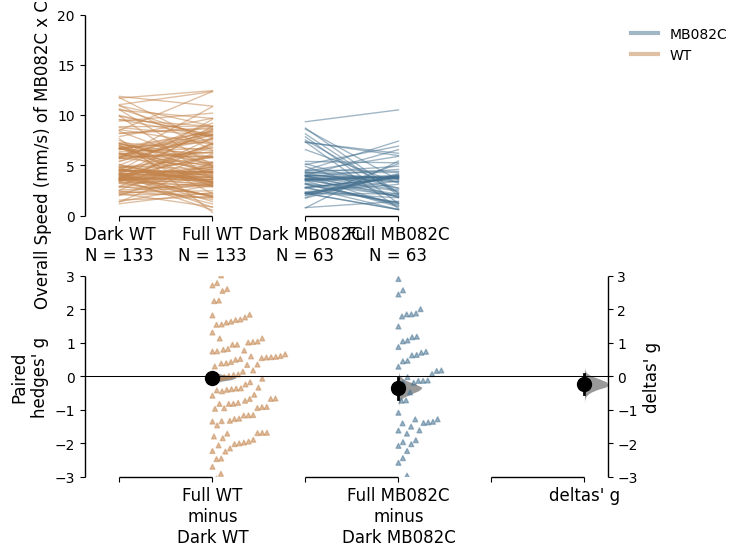

In [13]:
overallspeed.delta_g.plot(swarm_label="Overall Speed (mm/s) of " + transgenic ,
                                       es_marker_size=10, swarm_ylim=(0,20), contrast_ylim=(-3, 3));  

In [15]:
deltaplots.delta_g.results

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,resamples,random_seed,permutations,pvalue_permutation,permutation_count,permutations_var,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,Dark WT,Full WT,133,133,deltas' g,baseline,-0.059574,95,-0.264053,0.138943,...,5000,12345,"[-0.09367759278673038, 0.09367759278673038, 0....",0.5320,5000,"[0.011655077543482769, 0.011655077543482769, 0...",6.869748e-01,550.5,0.562993,0.579866
1,Dark MB082C,Full MB082C,63,63,deltas' g,baseline,-0.246988,95,-0.503898,-0.065525,...,5000,12345,"[0.14950781287347753, 0.14804093929020298, -0....",0.2598,5000,"[0.0014856151301619804, 0.0014857809312494412,...",2.375383e-10,186.0,0.168092,1.394670


2024.03.29


C:\Users\user\AppData\Roaming\Python\Python310\site-packages\dabest\plot_tools.py:1232: UserWarning: 48.9% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\dabest\plot_tools.py:1232: UserWarning: 63.5% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


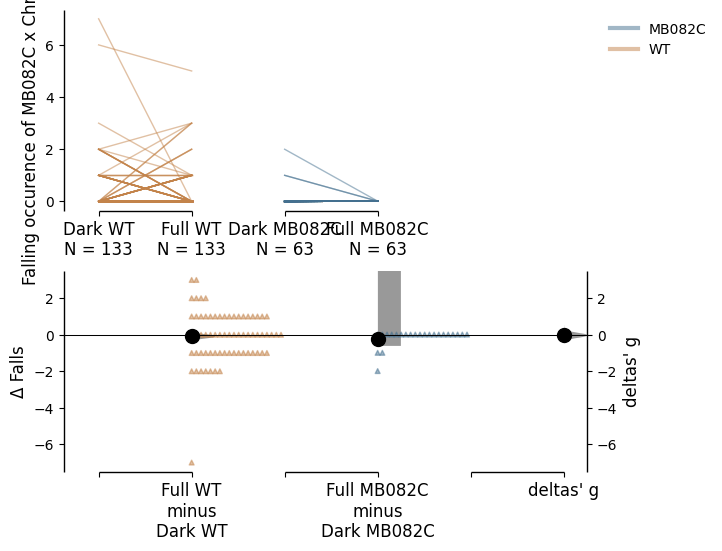

In [7]:
deltaplots.delta_g.plot(swarm_label="Falling occurence of " + transgenic,
                                     contrast_label="Δ Falls", raw_marker_size=2, es_marker_size=10);

# no need to run beyond this point!

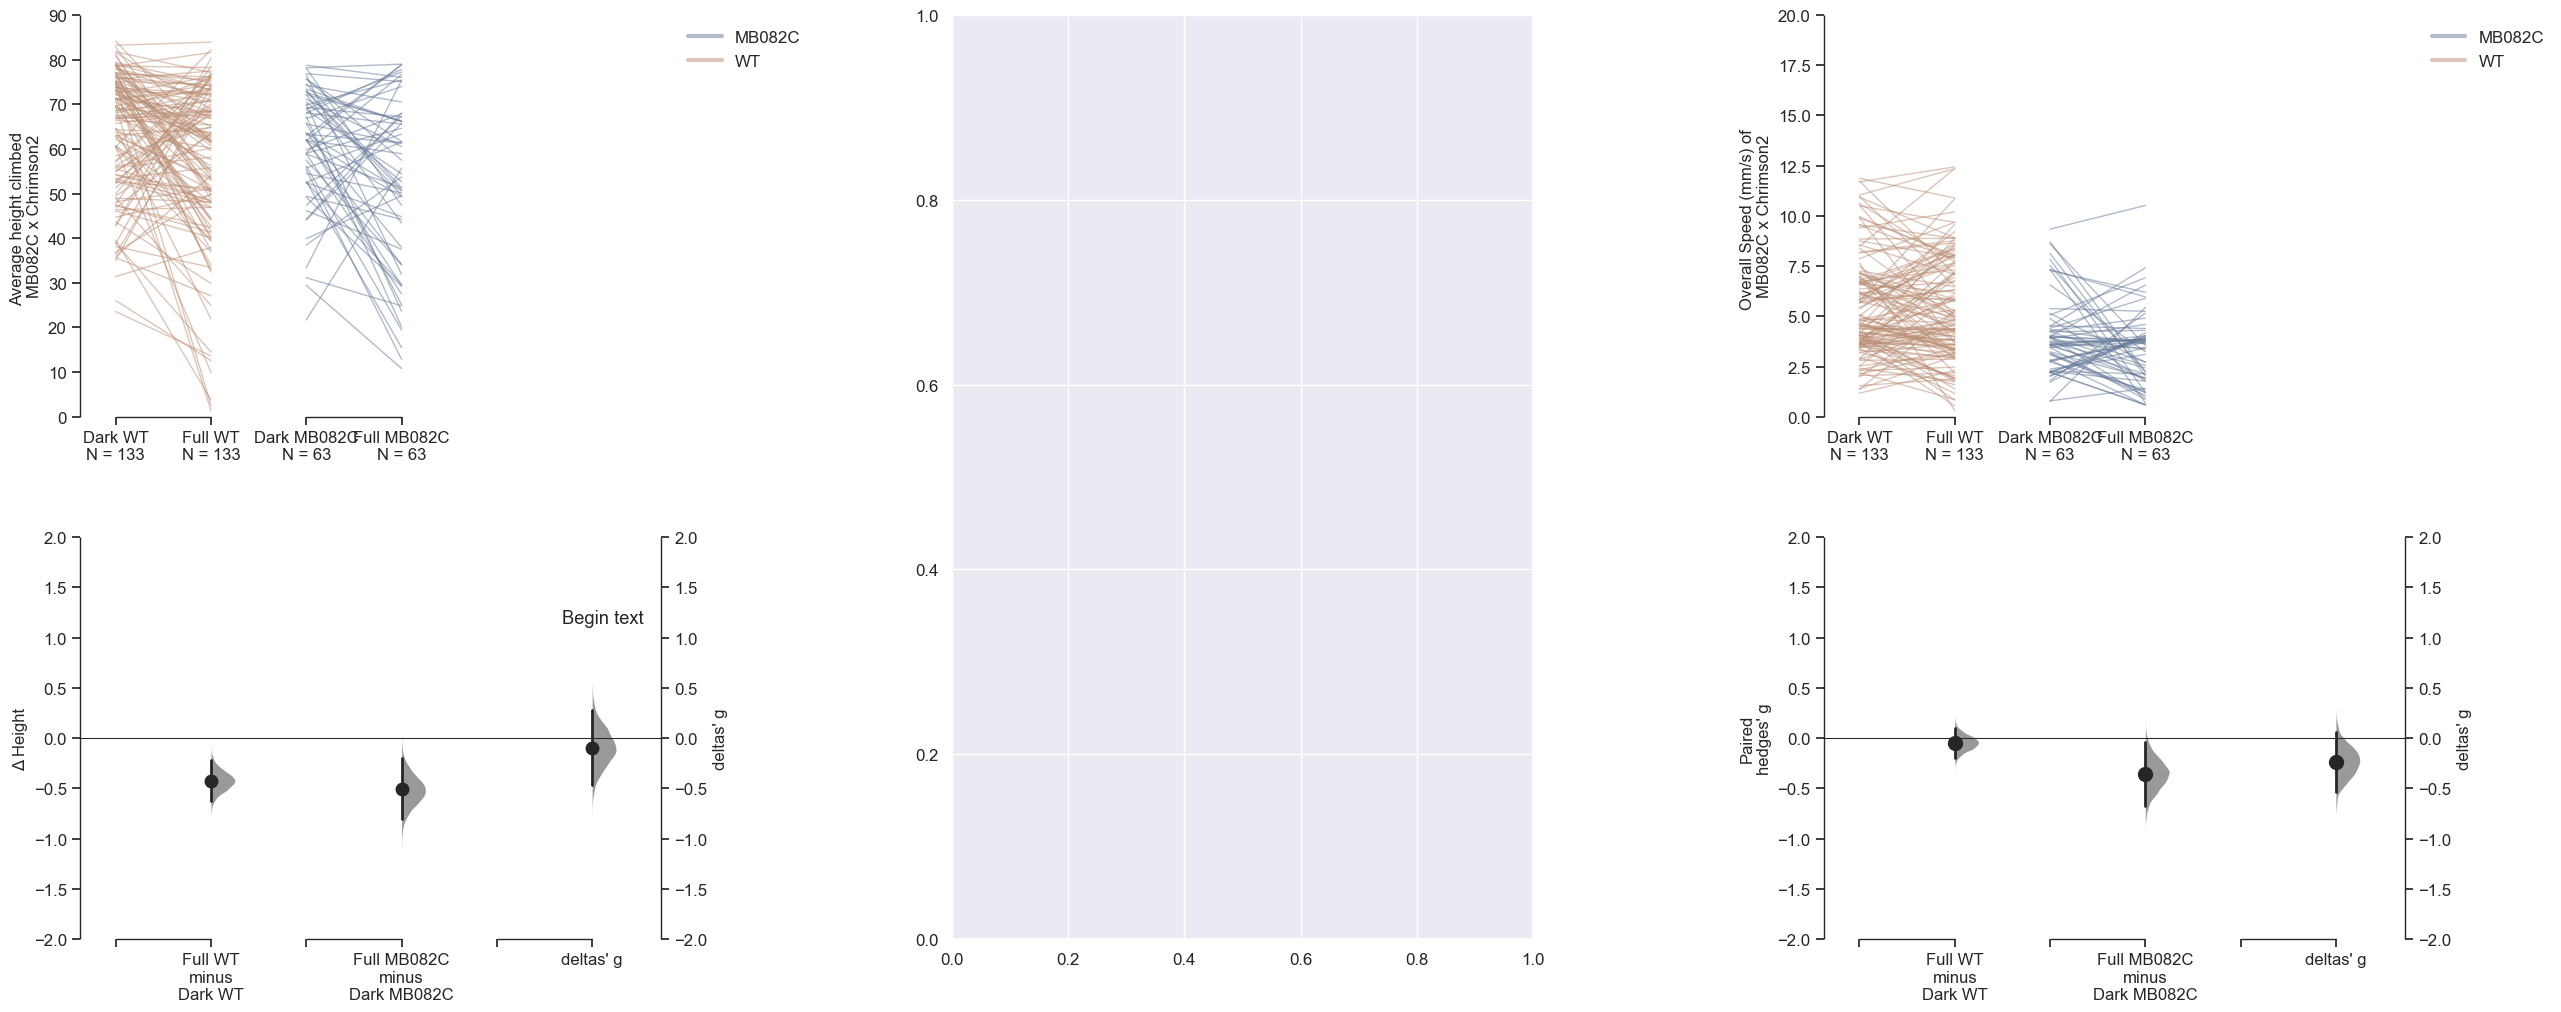

In [18]:
import seaborn as sns
f, axx = plt.subplots(nrows=1, ncols=3,
                    figsize=(30
                             ,12),
                    gridspec_kw={'wspace': 0.5
                                } # ensure proper width-wise spacing.
                   )



totalclimber.delta_g.plot(swarm_label="Average height climbed \n" + transgenic,
                                    contrast_label="Δ Height", swarm_ylim = (0,90), contrast_ylim=(-2, 2), ax=axx.flat[0]);



# paired_prop1.mean_diff.plot(bar_label = "Proportion of falls",contrast_ylim=(-2, 2), ax=axx.flat[0]);

##need to run this
# deltaplots.delta_g.plot(swarm_label="Falling occurence of " + transgenic,
#                                      contrast_label="Δ Falls", raw_marker_size=2, es_marker_size=10, swarm_ylim=(0,5), contrast_ylim=(-2, 2), ax=axx.flat[1]);



#includes recovery
# deltaplotrr.mean_diff.plot(swarm_label="Falling occurence of " + transgenic,
#                                      contrast_label="Δ falling", raw_marker_size=4, es_marker_size=5, swarm_ylim=(0,5), contrast_ylim=(-1, 1)); #, slopegraph_kwargs={'lw':3}




# timetoreach.mean_diff.plot(swarm_label="Time to reach average max height \n" + transgenic,
#                                      contrast_label="Δ Time", swarm_ylim = (0,25), contrast_ylim=(-20, 20));

overallspeed.delta_g.plot(swarm_label="Overall Speed (mm/s) of \n" + transgenic ,
                                       es_marker_size=10, swarm_ylim=(0,20), contrast_ylim=(-2, 2), ax=axx.flat[2]);       #contrast_label="Δ Speed",

#addition of deltag values
axx.flat[0].text(0.9,-0.5,'Begin text', horizontalalignment='center', verticalalignment='center', transform=axx.flat[0].transAxes)
axx.flat[2].text(0.9,-0.5,'Begin text', horizontalalignment='center', verticalalignment='center', transform=axx.flat[0].transAxes)

sns.set(font_scale=1.1)

In [41]:
f.savefig(openPath + 'images\\threedabestplots_20230915' +  transgenic + ".svg", dpi = 600)

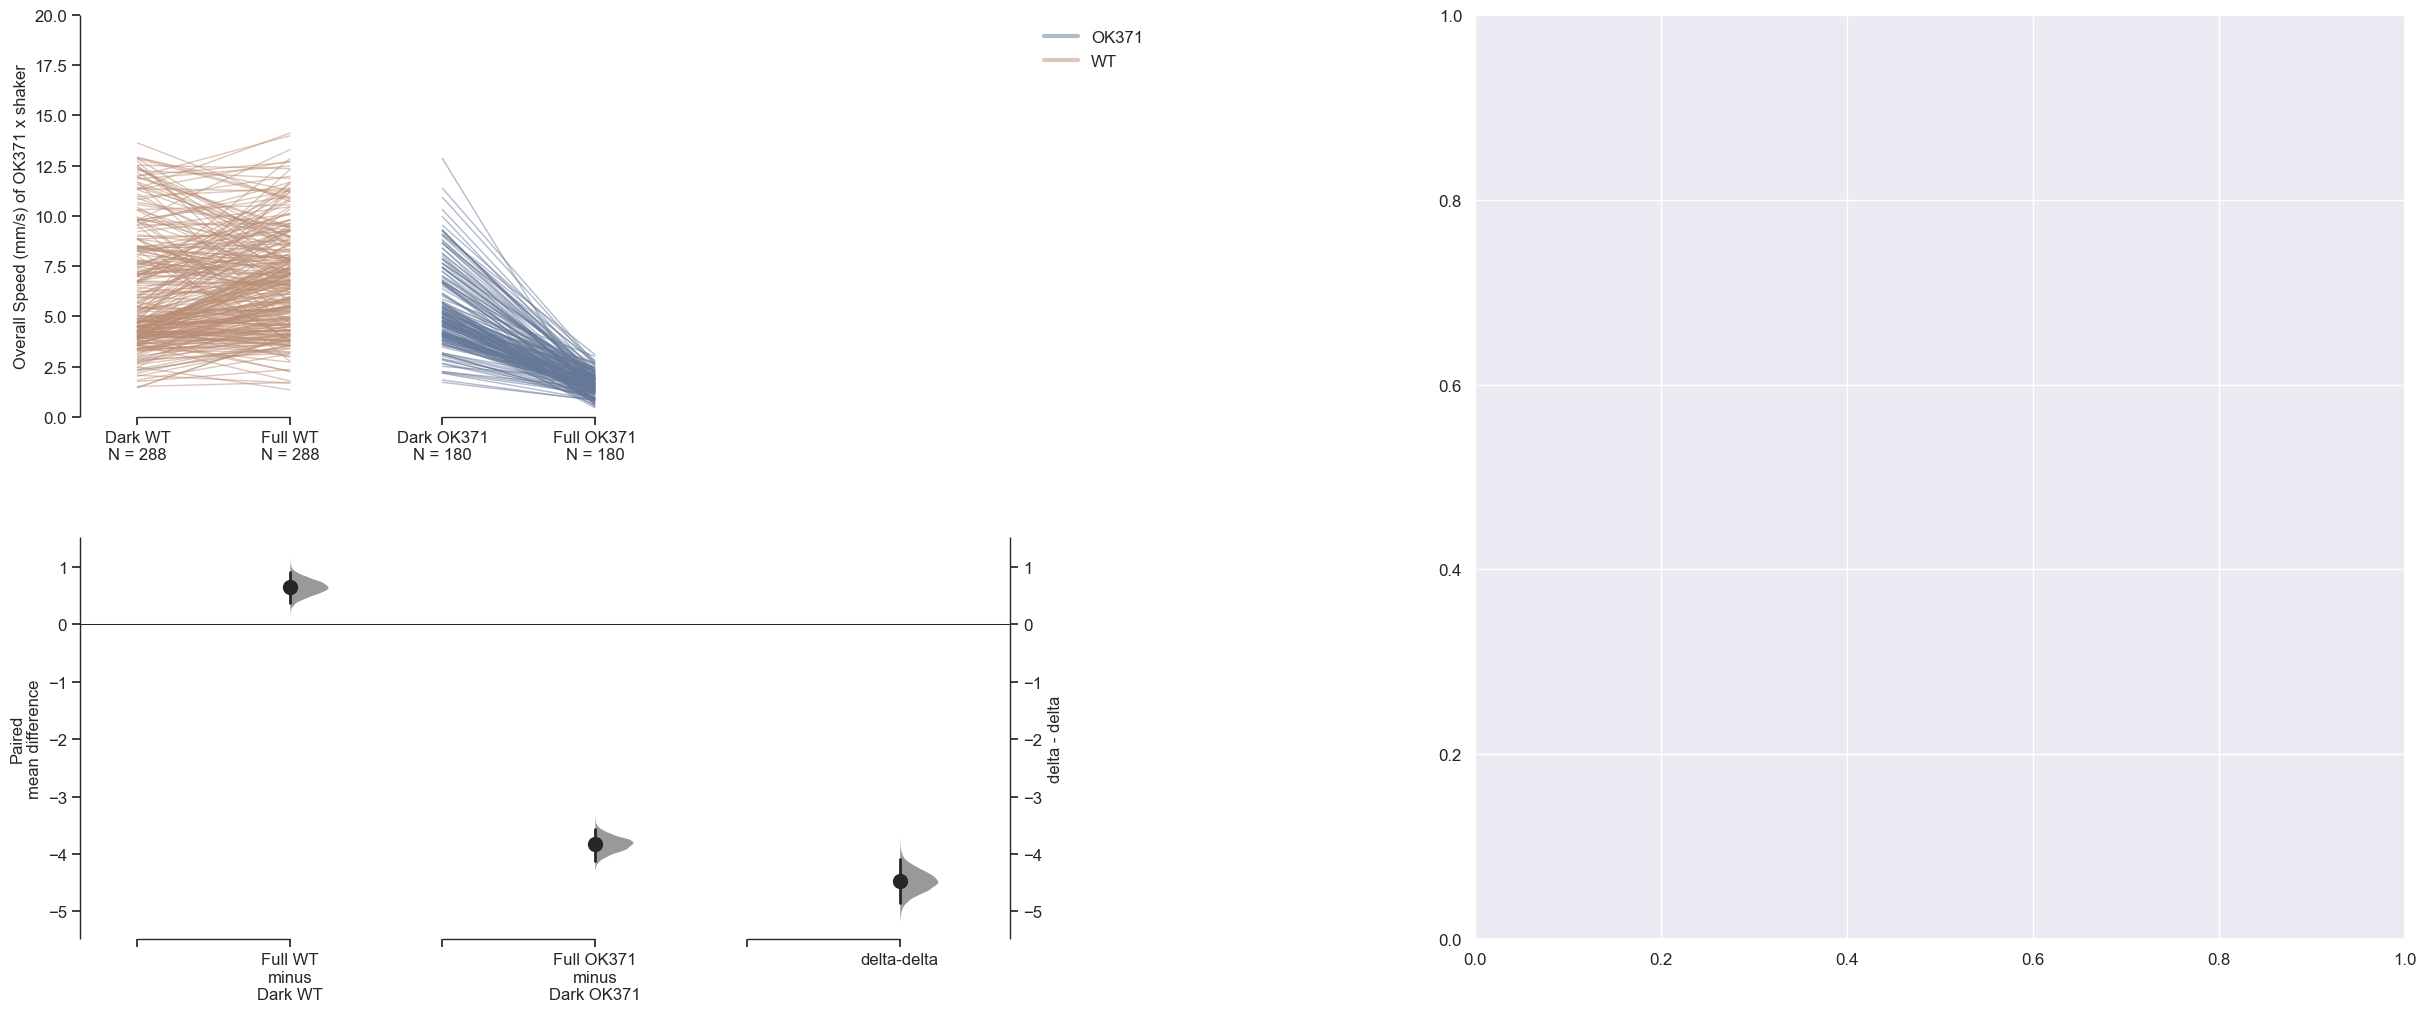

In [22]:
fig6, axx = plt.subplots(nrows=1, ncols=2,
                    figsize=(30
                             ,12),
                    gridspec_kw={'wspace': 0.5
                                } # ensure proper width-wise spacing.
                   )


overallspeed.mean_diff.plot(swarm_label="Overall Speed (mm/s) of " + transgenic ,
                                       es_marker_size=10, swarm_ylim=(0,20), ax=axx.flat[0]);       #contrast_label="Δ Speed",

sns.set(font_scale=1.1)
f.savefig(openPath + 'images\\dabestplots_20231001' +  transgenic + ".jpg", dpi = 600)

# Falling occurence

In [80]:
dfe_dark = dfexpt[(dfexpt['ExperimentState']== 'Dark')] 
dfe_full = dfexpt[(dfexpt['ExperimentState']== 'Full')] 
dfw_dark = dfwt[(dfwt['ExperimentState']== 'Dark')] 
dfw_full = dfwt[(dfwt['ExperimentState']== 'Full')] 
awt5 = falls(dfe_dark, dfe_full, dfw_dark, dfw_full)

awt5.loc[awt5['Type'] == 'Expt', 'Type'] = driver
awt5['genre'] = awt5['ExperimentState'] + " " + awt5['Type']
awt5['value'] = 0
awt5.loc[(awt5['Falls'] >0), ['value']] = 1

In [81]:
#falling occurence overall
import time
start_time = time.time()

deltaplots = dabest_jck.load(data=awt5, x=["ExperimentState","Type"], y="Falls", delta2 = True, experiment="Type", experiment_label = ["WT", driver], x1_level = ["Dark","Full"], paired = "baseline", id_col = "index")

# deltaplots.mean_diff.plot(swarm_label="Falling occurence of " + transgenic,
#                                      contrast_label="Δ falling", raw_marker_size=2, es_marker_size=10, swarm_ylim=(0,15), contrast_ylim=(-2, 2)); #, slopegraph_kwargs={'lw':3}

#deltaplots.mean_diff

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0039997100830078125 seconds ---


# falling occurence (separated)

In [22]:
dfe_dark = dfexpt[(dfexpt['ExperimentState']== 'Dark')] 
dfe_full = dfexpt[(dfexpt['ExperimentState']== 'Full')] 
dfw_dark = dfwt[(dfwt['ExperimentState']== 'Dark')] 
dfw_full = dfwt[(dfwt['ExperimentState']== 'Full')] 

first10_de = dfe_dark.head(int(len(dfe_dark)/2))
second10_de = dfe_dark.tail(int(len(dfe_dark)/2))
first10_fe = dfe_full.head(int(len(dfe_dark)/2))
second10_fe = dfe_full.tail(int(len(dfe_dark)/2))

first10_dw = dfw_dark.head(int(len(dfe_dark)/2))
second10_dw = dfw_dark.tail(int(len(dfe_dark)/2))
first10_fw = dfw_full.head(int(len(dfe_dark)/2))
second10_fw = dfw_full.tail(int(len(dfe_dark)/2))

In [23]:
dfe1020 = seap(dfexpt, "EXPT")
dfw1020 = seap(dfwt, "WT")

dftime = pd.DataFrame()
dftime = pd.concat([dfw1020, dfe1020], axis = 0)

dftime = dftime.reset_index(drop=False)

dftime['value']=0
dftime.loc[(dftime['metric'] >0), ['value']] = 1

In [24]:
tendftime = dftime[(dftime['time'] == 10)]
seconddftime = dftime[(dftime['time'] == 20)]

In [25]:
paired_delta1 = dabest.load(data = tendftime,
                              paired = "baseline", id_col="index",
                              x = ["phase", "type"], y = "metric",experiment_label = ["WT", "EXPT"], x1_level = ["Dark","Full"],
                              delta2 = True, experiment = "type")
paired_delta2 = dabest.load(data = seconddftime,
                              paired = "baseline", id_col="index",
                              x = ["phase", "type"], y = "metric",experiment_label = ["WT", "EXPT"], x1_level = ["Dark","Full"],
                              delta2 = True, experiment = "type")
delta1 = dabest.load(data = tendftime, id_col="index",
                              x = ["type", "phase"], y = "metric",experiment_label = ["Dark","Full"], x1_level = ["WT", "EXPT"],
                              delta2 = True, experiment = "phase")
delta2 = dabest.load(data = seconddftime,id_col="index",
                              x = ["type", "phase"], y = "metric",experiment_label = ["Dark","Full"], x1_level = ["WT", "EXPT"],
                              delta2 = True, experiment = "phase")

# fig, axx = plt.subplots(nrows=1, ncols=2,
#                     figsize=(20
#                              ,8),
#                     gridspec_kw={'wspace': 0.5} # ensure proper width-wise spacing.
#                    )

# paired_deltaplot1 = paired_delta1.mean_diff.plot(swarm_label="Falling occurences first 10seconds", 
#                                     contrast_label="Δ Falling", swarm_ylim = (0,5), contrast_ylim=(-1, 1), ax=axx.flat[0]);

# paired_deltaplot2 = paired_delta2.mean_diff.plot(swarm_label="Falling occurences second 10seconds", 
#                                     contrast_label="Δ Falling", swarm_ylim = (0,5), contrast_ylim=(-1, 1), ax=axx.flat[1]);

# prop plot

In [66]:
paired_prop1 = dabest.load(data = awt5,idx=(("Dark WT", "Full WT"),("Dark " + driver, "Full " + driver)),
                              paired = "baseline", id_col="index",proportional=True,
                              x = "genre", y = "value")

# paired_prop1.mean_diff.plot();

# AVG Max height DABEST

In [84]:
# mxheight = pd.DataFrame()
# hh = dfw_dark.filter(regex = "Y.*")
# mxheight["Height"]= hh.max(axis=0)
# avgmxheight = mxheight.mean()

heightexpt = NLMATH.maxheight(dfexpt, "expt")
heightwt = NLMATH.maxheight(dfwt, "wt")

heighttot=pd.DataFrame()
heighttot = pd.concat([heightexpt, heightwt], axis=1)

avgmaxheight_wt = heightwt['Max height wt'].mean() 


ce = NLMATH.timespentabovemeanline(dfexpt, avgmaxheight_wt, "Expt")
ce2 = NLMATH.timespentabovemeanline(dfwt, avgmaxheight_wt, "WT")

timehang = pd.DataFrame()
timehang = pd.concat([ce, ce2], axis = 0)
timehang['genre'] = timehang['ExperimentState'] + " " + timehang['Type']

timeabovemeanline = dabest_jck.load(data=timehang, x=["ExperimentState","Type"], y= "Time", delta2 = True, 
                           experiment="Type",experiment_label = ["WT", "Expt"], x1_level = ["Dark","Full"], 
                           paired = "sequential", id_col = "index")


In [85]:
timeabovemeanline = dabest_jck.load(data=timehang, x=["ExperimentState","Type"], y= "Time", delta2 = True, 
                           experiment="Type",experiment_label = ["WT", "Expt"], x1_level = ["Dark","Full"], 
                           paired = "sequential", id_col = "index")

# timeabovemeanline.mean_diff.plot(swarm_label="Time spent above average max height \n" + transgenic,
#                                     contrast_label="Δ Time", swarm_ylim = (0,25), contrast_ylim=(-10, 10));

# deltaplots3.mean_diff

# time to reach avgmaxheight - obsolete

In [29]:
# xx1 = NLCLIMB.timetoreach(dfwt, avgmaxheight_wt, "WT")
# xx2 =  NLCLIMB.timetoreach(dfexpt, avgmaxheight_wt, "Expt")
# timereach = pd.DataFrame()
# timereach = pd.concat([xx1, xx2], axis = 0)


In [30]:
# timetoreach = dabest.load(data=timereach, x=["ExperimentState","Type"], y= "Time", delta2 = True, 
#                            experiment="Type",experiment_label = ["WT", "Expt"], x1_level = ["Dark","Full"], 
#                            paired = "sequential", id_col = "index")

# # deltaplots4.mean_diff.plot(swarm_label="Time to reach average max height \n" + transgenic,
# #                                     contrast_label="Δ Time", swarm_ylim = (0,25), contrast_ylim=(-10, 10));

# #deltaplots4.mean_diff

# Overall speed of flies

In [82]:
df_se = NLMATH.velodabest(dfexpt, "Expt", "Velocity.*")
df_sw = NLMATH.velodabest(dfwt, "WT", "Velocity.*")

fgt6=pd.DataFrame()
fgt6 = pd.concat([df_se, df_sw]).reset_index(drop=False)
fgt6.loc[fgt6['Type'] == 'Expt', 'Type'] = driver
fgt6['genre'] = fgt6['ExperimentState'] + " " + fgt6['Type']
fgt6 = fgt6[(fgt6['ExperimentState'] != "Recovery") ]

In [83]:
overallspeed = dabest_jck.load(data=fgt6, x=["ExperimentState","Type"], y="Velocity.*", delta2 = True, experiment="Type", experiment_label = ["WT", driver], x1_level = ["Dark","Full"], paired = "baseline", id_col = "index")

# Speed Assimilation


In [33]:
three_expt = NLMATH.velodabest(dfexpt[(dfexpt['ExperimentState'] == 'Assimilation time - Dark')], "Expt", "Velocity.*")
three_wt = NLMATH.velodabest(dfwt[(dfwt['ExperimentState'] == 'Assimilation time - Dark')], "WT", "Velocity.*")

threes =pd.DataFrame()
threes = pd.concat([three_expt, three_wt]).reset_index(drop=False)

# Speed first FULL 10

In [34]:
speeddfe = sean(dfexpt, "EXPT")
speeddfw = sean(dfwt, "WT")

speeddf = pd.DataFrame()
speeddf = pd.concat([speeddfe, speeddfw], axis = 0)

speeddf = speeddf.reset_index(drop=False)

tendfspeed= speeddf[(speeddf['time'] == 10)]
seconddfspeed = speeddf[(speeddf['time'] == 20)]

#dabest plots
paired_delta3 = dabest.load(data = tendfspeed,
                              paired = "baseline", id_col="index",
                              x = ["phase", "type"], y = "metric",experiment_label = ["WT", "EXPT"], x1_level = ["Dark","Full"],
                              delta2 = True, experiment = "type")
paired_delta4 = dabest.load(data = seconddfspeed,
                              paired = "baseline", id_col="index",
                              x = ["phase", "type"], y = "metric",experiment_label = ["WT", "EXPT"], x1_level = ["Dark","Full"],
                              delta2 = True, experiment = "type")

In [35]:
#reverse

paired_delta5 = dabest.load(data = tendfspeed,
                              id_col="index",
                              x = ["type", "phase"], y = "metric",experiment_label = ["Dark", "Full"], x1_level = ["WT","EXPT"],
                              delta2 = True, experiment = "phase")
paired_delta6 = dabest.load(data = seconddfspeed,
                              id_col="index",
                              x = ["type", "phase"], y = "metric",experiment_label = ["Dark", "Full"], x1_level = ["WT","EXPT"],
                              delta2 = True, experiment = "phase")


# fig, axx = plt.subplots(nrows=1, ncols=2,
#                     figsize=(20
#                              ,8),
#                     gridspec_kw={'wspace': 0.5} # ensure proper width-wise spacing.
#                    )

# paired_deltaplot5 = paired_delta5.mean_diff.plot(swarm_label="Speed for first 10s of " + transgenic, 
#                                     contrast_label="Δ Speed", raw_marker_size = 3, swarm_ylim = (0,10), contrast_ylim=(-5, 5), ax=axx.flat[0]);

# paired_deltaplot6 = paired_delta6.mean_diff.plot(swarm_label="Speed for second 10s of " + transgenic, 
#                                     contrast_label="Δ Speed", raw_marker_size = 3,  swarm_ylim = (0,10), contrast_ylim=(-5, 5), ax=axx.flat[1]);


# only graphs

In [36]:
# import seaborn as sns

# fig, axx = plt.subplots(nrows=4, ncols=2,
#                     figsize=(30
#                              ,45),
#                     gridspec_kw={'wspace': 0.3} # ensure proper width-wise spacing.
#                    )


# timeabovemeanline.mean_diff.plot(swarm_label="Time spent above average max height \n" + transgenic,
#                                     contrast_label="Δ Time", swarm_ylim = (0,25), contrast_ylim=(-20, 20),  ax=axx.flat[0]);

# # timetoreach.mean_diff.plot(swarm_label="Time to reach average max height \n" + transgenic,
# #                                      contrast_label="Δ Time", swarm_ylim = (0,25), contrast_ylim=(-20, 20),  ax=axx.flat[1]);


# overallspeed.mean_diff.plot(swarm_label="Overall Speed (mm/s) of " + transgenic ,
#                                      contrast_label="Δ Speed",  es_marker_size=10, swarm_ylim=(0,30), contrast_ylim=(-4, 4),  ax=axx.flat[2]);       

# #speed 

# paired_delta3.mean_diff.plot(swarm_label="Speed for first 10s of " + transgenic, 
#                                     contrast_label="Δ Speed", swarm_ylim = (0,10), contrast_ylim=(-5, 5), ax=axx.flat[4]);

# paired_delta4.mean_diff.plot(swarm_label="Speed for second 10s of " + transgenic, 
#                                     contrast_label="Δ Speed", swarm_ylim = (0,10), contrast_ylim=(-5, 5), ax=axx.flat[5]);
# #unpaired


# paired_delta5.mean_diff.plot(swarm_label="Speed for first 10s of " + transgenic, 
#                                     contrast_label="Δ Speed", raw_marker_size = 3, swarm_ylim = (0,10), contrast_ylim=(-5, 5), ax=axx.flat[6]);

# paired_delta6.mean_diff.plot(swarm_label="Speed for second 10s of " + transgenic, 
#                                     contrast_label="Δ Speed", raw_marker_size = 3,  swarm_ylim = (0,10), contrast_ylim=(-5, 5), ax=axx.flat[7]);

# fig.delaxes(axx.flat[3])

# sns.set(font_scale=1.1)

# #fig.savefig(os.path.join(openPath, 'images\\',  transgenic + '_speed.svg'), dpi = 300)

In [37]:
# paired_delta3.mean_diff.plot(swarm_label="Speed for " + transgenic, 
#                                      contrast_label="Δ Speed", swarm_ylim = (0,25), contrast_ylim=(-5, 5));

In [38]:
# #falling

# import seaborn as sns

# fig2, axx = plt.subplots(nrows=3, ncols=2,
#                     figsize=(30
#                              ,45),
#                     gridspec_kw={'wspace': 0.3} # ensure proper width-wise spacing.
#                    )

# paired_prop1.mean_diff.plot(bar_label = "Proportion of falls", ax=axx.flat[0]);


# deltaplots.mean_diff.plot(swarm_label="Falling occurence of " + transgenic,
#                                      contrast_label="Δ falling", raw_marker_size=2, es_marker_size=10, swarm_ylim=(0,15), contrast_ylim=(-5, 5),  ax=axx.flat[1]);

# paired_delta1.mean_diff.plot(swarm_label="Falling occurences first 10s", 
#                                     contrast_label="Δ Falling", swarm_ylim = (0,10), contrast_ylim=(-2, 2), ax=axx.flat[2]);

# paired_delta2.mean_diff.plot(swarm_label="Falling occurences second 10s", 
#                                     contrast_label="Δ Falling", swarm_ylim = (0,10), contrast_ylim=(-2, 2), ax=axx.flat[3]);

# delta1.mean_diff.plot(swarm_label="Falling occurences first 10s", raw_marker_size=3,
#                                     contrast_label="Δ Falling", swarm_ylim = (0,5), contrast_ylim=(-5, 5), ax=axx.flat[4]);

# delta2.mean_diff.plot(swarm_label="Falling occurences second 10s", raw_marker_size=3,
#                                     contrast_label="Δ Falling", swarm_ylim = (0,5), contrast_ylim=(-5, 5), ax=axx.flat[5]);


# sns.set(font_scale=2)

# #fig2.savefig(os.path.join(openPath, 'images\\',  transgenic + '_falling.svg'), dpi = 300)

# testing recovery - falls

In [39]:
dfe_dark = dfexpt[(dfexpt['ExperimentState']== 'Dark')] 
dfe_full = dfexpt[(dfexpt['ExperimentState']== 'Full')] 
dfw_dark = dfwt[(dfwt['ExperimentState']== 'Dark')] 
dfw_full = dfwt[(dfwt['ExperimentState']== 'Full')] 
dfe_r = dfexpt[(dfexpt['ExperimentState']== 'Recovery')] 
dfw_r = dfwt[(dfwt['ExperimentState']== 'Recovery')] 
ggggg = fallsr(dfe_dark, dfe_full, dfw_dark, dfw_full, dfe_r, dfw_r)

In [40]:
deltaplotr = dabest.load(data = ggggg, idx = (("Dark WT", "Full WT", "Recovery WT"), ("Dark Expt", "Full Expt", "Recovery Expt")), x="ExperimentState", y="Falls", paired = "baseline", id_col = "index")
# deltaplotr.mean_diff.plot(swarm_label="Falling occurence of " + transgenic,
#                                      contrast_label="Δ falling", raw_marker_size=4, es_marker_size=5, swarm_ylim=(0,5), contrast_ylim=(-1, 1)); #, slopegraph_kwargs={'lw':3}

#sns.set(font_scale=0.8)

In [41]:
deltaplotrr = dabest.load(data = ggggg, idx = (("Dark WT", "Dark Expt"), ("Full WT", "Full Expt"), ("Recovery WT", "Recovery Expt")), x="ExperimentState", y="Falls")


# deltaplotrr.mean_diff.plot(swarm_label="Falling occurence of " + transgenic,
#                                      contrast_label="Δ falling", raw_marker_size=4, es_marker_size=5, swarm_ylim=(0,5), contrast_ylim=(-1, 1)); #, slopegraph_kwargs={'lw':3}
#sns.set(font_scale=0.8)

# speed + recovery

In [42]:
df_se = NLMATH.velodabest(dfexpt, "Expt", "Velocity.*")
df_sw = NLMATH.velodabest(dfwt, "WT", "Velocity.*")
df_sw["genre"] = df_sw["ExperimentState"] + " " + df_sw["Type"]
df_se["genre"] = df_se["ExperimentState"] + " " + df_se["Type"]
oo6=pd.DataFrame()
oo6 = pd.concat([df_se, df_sw]).reset_index(drop=False)


In [43]:
deltaplot6 = dabest.load(data = oo6, idx = (("Dark WT", "Dark Expt"), ("Full WT", "Full Expt"), ("Recovery WT", "Recovery Expt")), x="genre", y="Velocity")
# deltaplot6.mean_diff.plot(swarm_label="Speed of " + transgenic,
#                                      contrast_label="Δ Speed", raw_marker_size=4, es_marker_size=5, swarm_ylim=(0,15), contrast_ylim=(-5, 5)); #, slopegraph_kwargs={'lw':3}


In [44]:
deltaplot6 = dabest.load(data = oo6, idx = (("Dark WT", "Full WT", "Recovery WT"), ("Dark Expt", "Full Expt", "Recovery Expt")), x="genre", y="Velocity", paired = "baseline", id_col = "index")
# deltaplot6.mean_diff.plot(swarm_label="Speed of " + transgenic,
#                                      contrast_label="Δ falling", raw_marker_size=4, es_marker_size=5, swarm_ylim=(0,15), contrast_ylim=(-5, 5)); #, slopegraph_kwargs={'lw':3}


# total graphs